In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

layer = tf.keras.layers.experimental.preprocessing.Normalization()
layer.adapt(train_images)

# Normalize pixel values to be between 0 and 1
# train_images, test_images = train_images / 255.0, test_images / 255.0

In [3]:
layer.mean, layer.variance

(<tf.Variable 'mean:0' shape=(3,) dtype=float32, numpy=array([125.30692, 122.95025, 113.86542], dtype=float32)>,
 <tf.Variable 'variance:0' shape=(3,) dtype=float32, numpy=array([3968.1345, 3854.9944, 4449.527 ], dtype=float32)>)

In [4]:
train_image_one = layer(train_images[:1])

In [5]:
np.min(train_image_one), np.max(train_image_one)

(-1.9892157, 2.0945833)

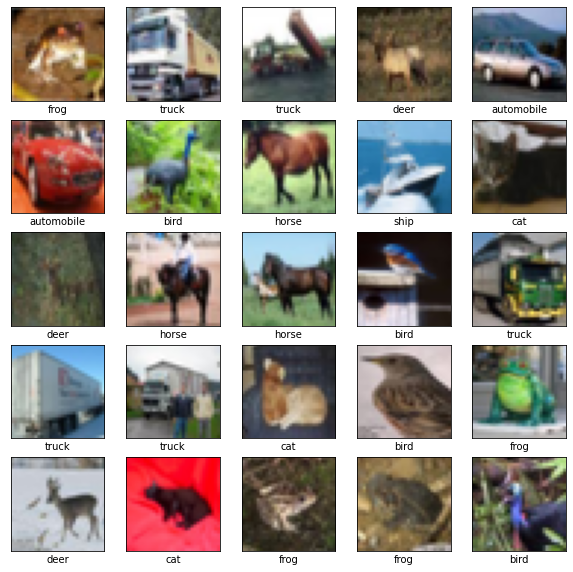

In [6]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [7]:

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

In [11]:
from tensorflow.keras import regularizers

train_num = 5
train_acc_list = []
train_loss_list = []
val_acc_list = []
val_loss_list = []

for i in range(train_num):
    model = models.Sequential()
    model.add(tf.keras.layers.experimental.preprocessing.Normalization(mean=layer.mean.numpy(), variance=layer.variance.numpy()))
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    # model.add(layers.Dropout(0.5))
    model.add(layers.Dense(10))

    model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

    history = model.fit(train_images, train_labels, epochs=10,
                        validation_data=(test_images, test_labels), verbose=2)

    train_loss, train_acc = model.evaluate(train_images, train_labels, verbose=2)
    test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

    train_acc_list.append(train_acc)
    train_loss_list.append(train_loss)
    val_acc_list.append(test_acc)
    val_loss_list.append(test_loss)

Epoch 1/10
1563/1563 - 7s - loss: 1.5357 - accuracy: 0.4909 - val_loss: 1.2992 - val_accuracy: 0.5758
Epoch 2/10
1563/1563 - 5s - loss: 1.1891 - accuracy: 0.6277 - val_loss: 1.1422 - val_accuracy: 0.6398
Epoch 3/10
1563/1563 - 6s - loss: 1.0742 - accuracy: 0.6770 - val_loss: 1.0698 - val_accuracy: 0.6807
Epoch 4/10
1563/1563 - 5s - loss: 1.0118 - accuracy: 0.7022 - val_loss: 1.0396 - val_accuracy: 0.7004
Epoch 5/10
1563/1563 - 5s - loss: 0.9686 - accuracy: 0.7226 - val_loss: 0.9857 - val_accuracy: 0.7174
Epoch 6/10
1563/1563 - 5s - loss: 0.9370 - accuracy: 0.7351 - val_loss: 0.9990 - val_accuracy: 0.7180
Epoch 7/10
1563/1563 - 5s - loss: 0.9109 - accuracy: 0.7491 - val_loss: 0.9582 - val_accuracy: 0.7369
Epoch 8/10
1563/1563 - 6s - loss: 0.8868 - accuracy: 0.7583 - val_loss: 0.9718 - val_accuracy: 0.7338
Epoch 9/10
1563/1563 - 5s - loss: 0.8720 - accuracy: 0.7653 - val_loss: 0.9813 - val_accuracy: 0.7330
Epoch 10/10
1563/1563 - 5s - loss: 0.8591 - accuracy: 0.7711 - val_loss: 0.9527 - 

In [12]:
np.mean(val_acc_list)

0.7317000031471252

313/313 - 0s - loss: 0.9956 - accuracy: 0.7293


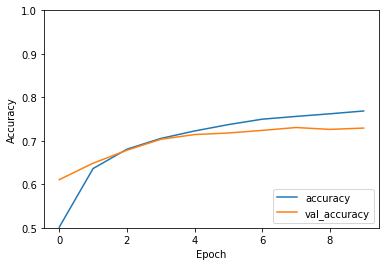

In [13]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [14]:
print(test_acc)

0.7293000221252441
